# Keras: loading custom dataset

In [1]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#check if gpu is available
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

## Load the csv file

In [3]:
data = pd.read_csv("wikicorpus_v2.csv")

## Vectorize the text data

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["text"].tolist())
labels = LabelEncoder().fit_transform(data["category"])
vocab = vectorizer.vocabulary_

In [5]:
encoder = OneHotEncoder(sparse=False)
labels = labels.reshape((6000, 1))
encoder.fit_transform(labels)

/home/jan/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Split data into train, val and test sets

### Split the 6000 articles into 3600 train datasets and 2400 test datasets (80/20 split)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.4) #, random_state=50, shuffle=True)

In [7]:
x_train.shape

(3600, 281396)

### Split the 2400 test datasets into 1200 test datatsets amd 1200 val datasets (60/20/20 split)

In [8]:
x_val = x_test[:1200]
x_test = x_test[1200:]

y_val = y_test[:1200]
y_test = y_test[1200:]

y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

## Build a simple multi-classification model

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(len(vocab),)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(30, activation="softmax")) #len(np.unique(labels)) = number of the categories (30)

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
history = model.fit(x_train,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(x_test, y_test))

Train on 3600 samples, validate on 1200 samples
Epoch 1/10
3600/3600 [==============================] - 10s 3ms/step - loss: 0.2409 - acc: 0.9533 - val_loss: 0.4400 - val_acc: 0.9308
Epoch 2/10
3600/3600 [==============================] - 10s 3ms/step - loss: 0.1976 - acc: 0.9586 - val_loss: 0.3768 - val_acc: 0.9317
Epoch 3/10
3600/3600 [==============================] - 9s 3ms/step - loss: 0.1680 - acc: 0.9650 - val_loss: 0.3656 - val_acc: 0.9300
Epoch 4/10
3600/3600 [==============================] - 9s 3ms/step - loss: 0.1400 - acc: 0.9714 - val_loss: 0.4047 - val_acc: 0.9342
Epoch 5/10
3600/3600 [==============================] - 10s 3ms/step - loss: 0.1313 - acc: 0.9739 - val_loss: 0.3844 - val_acc: 0.9342
Epoch 6/10
3600/3600 [==============================] - 9s 3ms/step - loss: 0.1212 - acc: 0.9739 - val_loss: 0.3643 - val_acc: 0.9300
Epoch 7/10
3600/3600 [==============================] - 9s 3ms/step - loss: 0.1026 - acc: 0.9803 - val_loss: 0.3492 - val_acc: 0.9358
Epoch 8/10


## Plot the results

In [12]:
def plot_results(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    plt.clf() #clears the figure

    acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()

    plt.show()

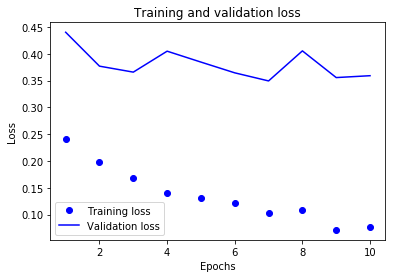

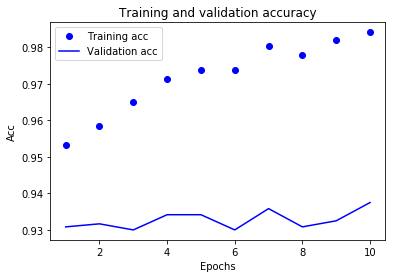

In [13]:
plot_results(history)

## Compare val and test dataset

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1200/1200 [==============================] - 2s 2ms/step


In [15]:
print(f"Results:\nTest_acc: {np.around(test_acc, decimals=2)}\nVal_acc: {np.around(np.mean(history.history['val_acc']), decimals=2)}") #{np.around(np.mean(history["val_acc"]), decimals=2))

Results:
Test_acc: 0.94
Val_acc: 0.93
